The shape of the image is (28, 28)
The training set contains 35000 images
The shape of the train image is (28, 28)
The testing set contains 15000 images
The shape of the test image is (28, 28)
The training set contains 35000 labels
The testing set contains 15000 labels
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
m is: 35000
(35000, 28, 28)
shape of x train: (784, 35000)
shape of y_train: (1, 35000)
(15000, 28, 28)
shape of x test: (784, 15000)
shape of y_test: (1, 15000)
size of weight is: (784, 1)
weight is: [[ 4.00380333e-03]
 [-2.06863851e-02]
 [ 1.93456649e-03]
 [ 1.54852963e-03]
 [ 3.07811314e-02]
 [-1.58365820e-02]
 [ 1.01297267e-02]
 [-3.27463176e-02]
 [-9.67122259e-04]
 [ 1.78350019e-02]
 [ 2.03569068e-02]
 [ 3.29966427e-02]
 [ 3.29530215e-03]
 [ 2.80032480e-03]
 [ 4.48028069e-03]
 [ 1.40508467e-02]
 [-1.08350237e-02]
 [ 2.67578581e-02]
 [-2.46455832e-02]
 [ 3.37978682e-03]
 [ 1.22541988e-02]
 [ 3.04501571e-03]
 [ 1.31972658e-02]
 [ 1.40119971e-02]
 [-3.17472928e-02]
 [-2.02430165e-02]

C:\Users\HPP\Anaconda3new\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


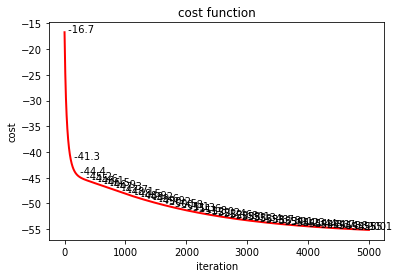

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb  4 11:16:27 2019
Goal is to detect the number '8'

@author: HPP
"""
#Goal: to detect number '8'
%matplotlib inline
import os
import numpy as np
import struct
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

path = 'C:/Users/HPP/Desktop/Python/DL clas/MNIST'   # the training set is stored in this directory

# Train data
fname_train_images = os.path.join(path, 'train-images.idx3-ubyte')  # the training set image file path
fname_train_labels = os.path.join(path, 'train-labels.idx1-ubyte')  # the training set label file path
    
# open the label file and load it to the "train_labels"
with open(fname_train_labels, 'rb') as flbl:
    magic, num = struct.unpack(">II", flbl.read(8))
    train_labels = np.fromfile(flbl, dtype=np.uint8)

# open the image file and load it to the "train_images"
with open(fname_train_images, 'rb') as fimg:
    magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
    train_images = np.fromfile(fimg, dtype=np.uint8).reshape(len(train_labels), rows, cols)
    
#print('The training set contains', len(train_images), 'images')  # print the how many images contained in the training set
print('The shape of the image is', train_images[0].shape)  # print the shape of the image

#imgNumber = 5  # choose which image you want to display
#print('The image matrix is', train_images[imgNumber])  # print the label of the image displayed


##_--------------Data Preprocessing ----------------------------------##
#Goal of this section: segregating the data into small chunks, changing the label, seperate train & test data

num_samples=50000  #select the size of data for segregating

train_images_section= train_images[0:num_samples]
train_labels_section= train_labels[0:num_samples]

train_images_section=train_images_section/255    # data Normalization

#changing label of data 
for i in range(0,num_samples):
 #print('Trainlabel:\n',train_labels_section[i]) 
 if(train_labels_section[i]==8):
   train_labels_section[i]=1
 else:
   train_labels_section[i]=0
 #print('New Train label:\n',train_labels[i])

#segregate the data in train and test data 
X_train, X_test, y_train, y_test = train_test_split( train_images_section, train_labels_section, test_size=0.3)

print('The training set contains', len(X_train), 'images')  # print the how many images contained in the training set
print('The shape of the train image is', X_train[0].shape)  # print the shape of the image

print('The testing set contains', len(X_test), 'images')  # print the how many images contained in the training set
print('The shape of the test image is', X_test[0].shape)  # print the shape of the image

print('The training set contains', len(y_train), 'labels')  # print the how many images contained in the training set
print('The testing set contains', len(y_test), 'labels')  # print the how many images contained in the training set

print(y_train)
print(y_test)

##------------Preparing vectorized form of data--------------------##

m=X_train.shape[0]
print('m is:',m)
print(X_train.shape);
X_train_m=X_train.reshape(X_train.shape[1]*X_train.shape[2],X_train.shape[0])
print('shape of x train:',X_train_m.shape)
y_train_v=y_train.reshape(y_train.shape[0],1).T
print('shape of y_train:',y_train_v.shape)

print(X_test.shape);
X_test_m=X_test.reshape(X_test.shape[1]*X_test.shape[2],X_test.shape[0])
print('shape of x test:',X_test_m.shape)
y_test_v=y_test.reshape(y_test.shape[0],1).T
print('shape of y_test:',y_test_v.shape)

#initilising the weights & bias and learnig rate
W=np.zeros((X_train.shape[1]*X_train.shape[2],1))
b=0
print("size of weight is:",W.shape)
alpha = 0.01
cost=[]
iteration=[]
for itr in range(5000):

#Forward propogation 
 Z=np.dot(W.T,X_train_m)+b
 #print('Z:',Z)
 #print('sixe of z:',Z.shape)
 a = 1/(1+np.exp(-Z))
 #print('size of a:',a.shape)
 #print(a)

 J=-y_train_v*(np.log(a))-(1-y_train_v)*np.log(1-a)
 #print(J.shape)
 #print('Length of J:',len(J.T))
 J= np.sum(J)/m
 cost.append(J)
 iteration.append(itr)
 #print('Sum of loss(j):',J)

#Backward propogation 
 dz= a-y_train_v
 #print('shape of dz:',dz.shape)
 #print('shape of x_train_m:',X_train_m.shape)
 dw=(1/m)* np.dot(X_train_m,dz.T)
 db= (1/m)*np.sum(dz)
 
#weight updation
 W=W-alpha*dw
 b=b-alpha*db
 #print("weight's 0th index element is:",W[0])
 #print('Bias 0th index value :',b)
print('weight is:',W)
print('Bias is:',b)
fig=pyplot.figure();
pyplot.title("cost function")
pyplot.xlabel("iteration")
pyplot.ylabel("cost");
pyplot.plot(iteration,cost, color='red',linewidth=2,label="J cost") 
ax = fig.add_subplot(111)
for n in range(0,len(cost)):
 if(n%100==0): 
   ax.annotate(' %0.1f'%cost[n], xy=(iteration[n],cost[n]))
 

##----------------------  Prediction -------------------------------##
   
Z=np.dot(W.T,X_test_m)+b
#print('Z:',Z)
print('sixe of z:',Z.shape)
a = 1/(1+np.exp(-Z))
print('size of a:',a.shape)
#print(a)
print(a.shape[1])
for i in range(a.shape[1]):
    if(a[0,i]<0.5):
        a[0,i]=0
    else:
        a[0,i]=1
        
#print(a)
#print(y_test_v)
a=a.reshape(a.shape[1],)
#print('new a:',a)
y_test_v=y_test_v.reshape(y_test_v.shape[1],)
#print(y_test_v)
cm = confusion_matrix(y_test_v, a)




In [39]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=pyplot.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    pyplot.imshow(cm, interpolation='nearest', cmap=cmap)
    pyplot.title(title)
    pyplot.colorbar()
    tick_marks = np.arange(len(classes))
    pyplot.xticks(tick_marks, classes, rotation=45)
    pyplot.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pyplot.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    pyplot.ylabel('True label')
    pyplot.xlabel('Predicted label')
    pyplot.tight_layout()



Confusion matrix, without normalization
[[13517     0]
 [ 1483     0]]


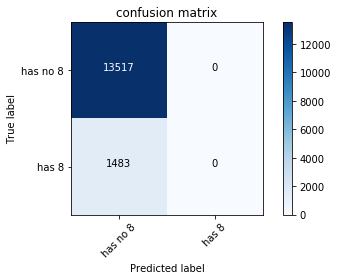

In [40]:
cm_plot_labels=['has no 8','has 8']
plot_confusion_matrix(cm,cm_plot_labels,title='confusion matrix')